# Загрузка библиотек и чистка датасета

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
interact = pd.read_csv("/content/drive/MyDrive/Dataton24/interactiondata-ef3a6513-9759-444d-8190-c34674e598ad.csv")
order = pd.read_csv("/content/drive/MyDrive/Dataton24/orderdata-12409682-6f38-4fcd-bd53-6af2fd8c91c7.csv")
usd = pd.read_csv("/content/drive/MyDrive/Dataton24/userdata-b66177fb-1f96-4dfd-9b28-15b118ef4551.csv")

Количество пользователей по категориям

In [24]:
order_data_filtered = order[order['avg_bill'] > 0]
users_per_category = order_data_filtered.groupby('category')['userId'].nunique().reset_index()
total_unique_users = order_data_filtered['userId'].nunique()
users_per_category['percentage'] = (users_per_category['userId'] / total_unique_users) * 100
users_per_category.columns = ['Category', 'Unique Users', 'Percentage']

users_per_category

,Category,Unique Users,Percentage
0,alcohol,2302,67.606461
1,fish,2878,84.522761
2,fruits,3003,88.193833
3,meat,2289,67.224670
4,other,3351,98.414097
5,sweets,2976,87.400881
6,vegetables,2984,87.635830


In [25]:
interact = interact.rename(columns={"UserId":"userid"})
order = order.rename(columns={"userId":"userid"})
merge_data = usd.merge(interact, on="userid")
df_m = order.merge(merge_data)

In [26]:
df_m = df_m[df_m['category'] != 'alcohol']
df_m = df_m[(df_m.select_dtypes(include=[float, int]) >= 0).all(axis=1)]
file_path = 'true_vamp.csv'
df_m.to_csv(file_path, index=False)

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Dataton24/true_vamp.csv')

In [31]:
df

,Unnamed: 0,userid,category,avg_bill,join_datetime,age,income,kids,teenagers,marital,...,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
0,0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
1,1,2c6336a2-852b-48af-9150-9b9030387f5d,sweets,55.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
2,2,2c6336a2-852b-48af-9150-9b9030387f5d,vegetables,294.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
3,3,2c6336a2-852b-48af-9150-9b9030387f5d,meat,360.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
4,4,2c6336a2-852b-48af-9150-9b9030387f5d,other,275.0,2024-02-14 10:03:56,49,71463.0,1,1,married,...,6,3,6,7,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17822,23829,51773a75-1cd4-48b1-84d6-d56f9266a8ee,fruits,930.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1
17823,23830,51773a75-1cd4-48b1-84d6-d56f9266a8ee,meat,90.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1
17824,23831,51773a75-1cd4-48b1-84d6-d56f9266a8ee,other,21.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1
17825,23832,51773a75-1cd4-48b1-84d6-d56f9266a8ee,sweets,108.0,2023-06-25 21:05:45,16,26833.0,0,0,single,...,2,2,2,2,8,1,1,0,0,1


Удаляем лишний столбец и столбец образования (есть дети с высшим образованием) + общая сводка по данным

In [33]:
df = df.drop(columns=['Unnamed: 0', 'education'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17827 entries, 0 to 17826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   userid                         17827 non-null  object 
 1   category                       17827 non-null  object 
 2   avg_bill                       17827 non-null  float64
 3   join_datetime                  17827 non-null  object 
 4   age                            17827 non-null  int64  
 5   income                         17827 non-null  float64
 6   kids                           17827 non-null  int64  
 7   teenagers                      17827 non-null  int64  
 8   marital                        17827 non-null  object 
 9   complain_count                 17827 non-null  int64  
 10  last_order_dt                  17488 non-null  object 
 11  discount_purchases_count_avg   17827 non-null  int64  
 12  catalogue_purchases_count_avg  17827 non-null 

# Посмотрим ситуацию с чеками и зарплатами

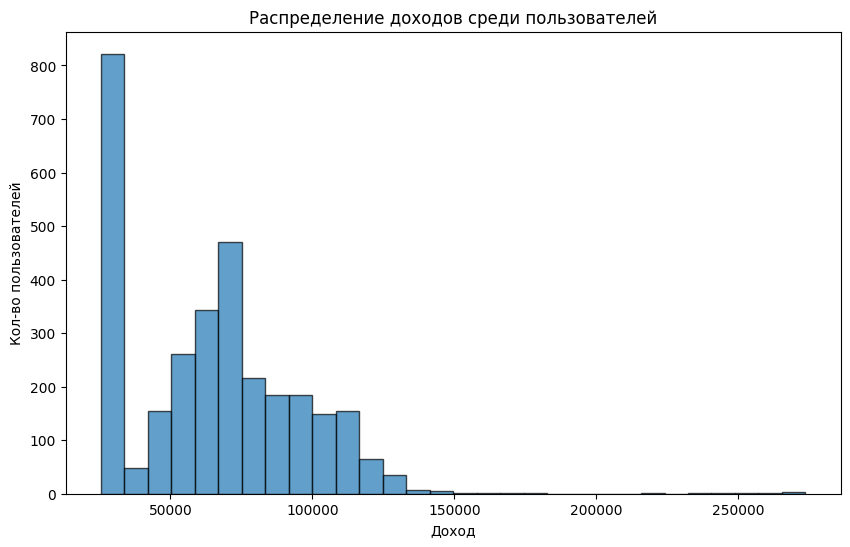

In [34]:
unique_income = df.drop_duplicates(subset='userid')
plt.figure(figsize=(10, 6))
plt.hist(unique_income['income'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Доход')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение доходов среди пользователей')
plt.show()

Поделим по группам дохода

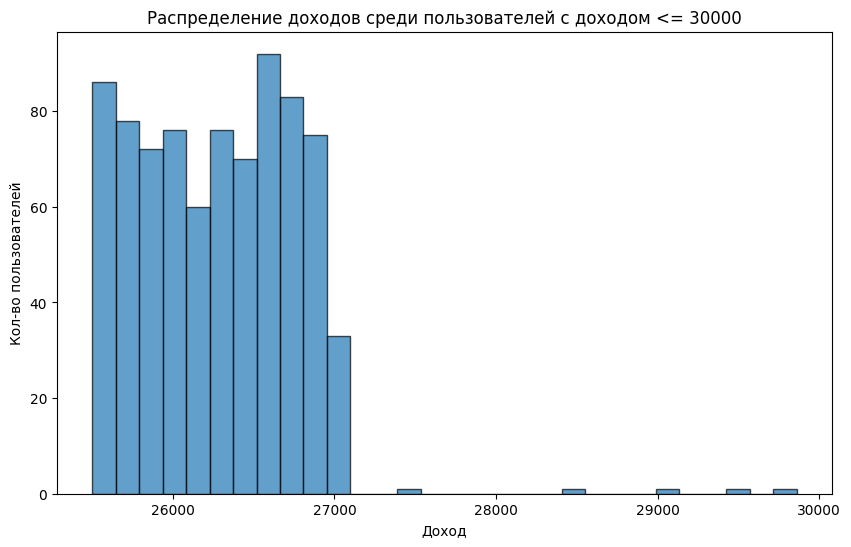

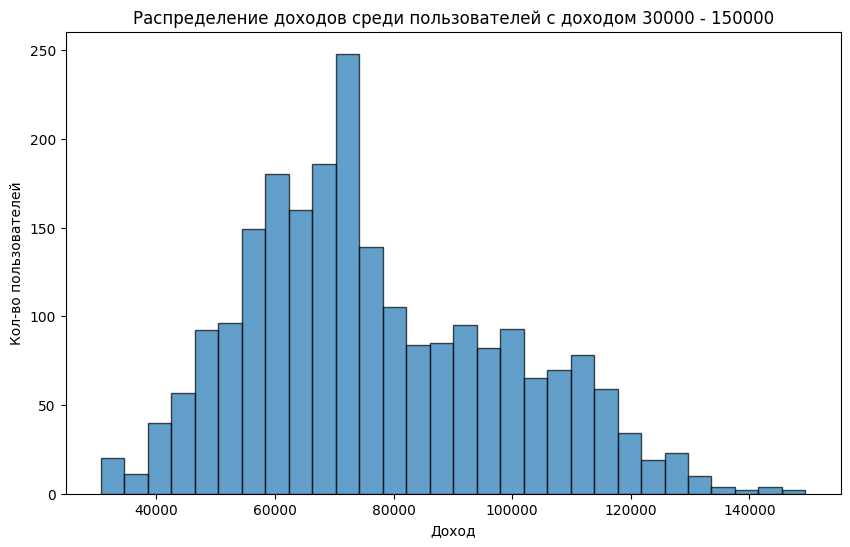

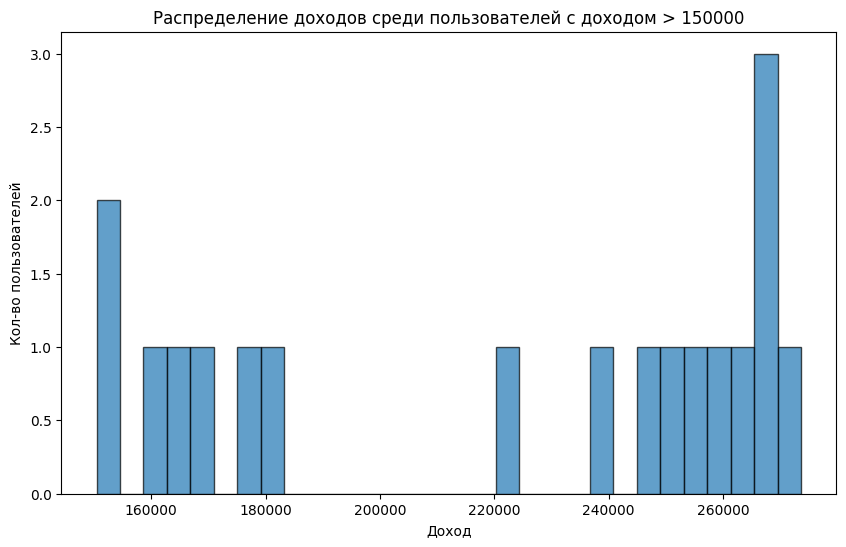

In [35]:
unique_income = df.drop_duplicates(subset='userid')

income_low = unique_income[unique_income['income'] <= 30000]
income_mid = unique_income[(unique_income['income'] > 30000) & (unique_income['income'] <= 150000)]
income_high = unique_income[unique_income['income'] > 150000]


plt.figure(figsize=(10, 6))
plt.hist(income_low['income'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Доход')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение доходов среди пользователей с доходом <= 30000')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(income_mid['income'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Доход')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение доходов среди пользователей с доходом 30000 - 150000')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(income_high['income'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Доход')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение доходов среди пользователей с доходом > 150000')
plt.show()

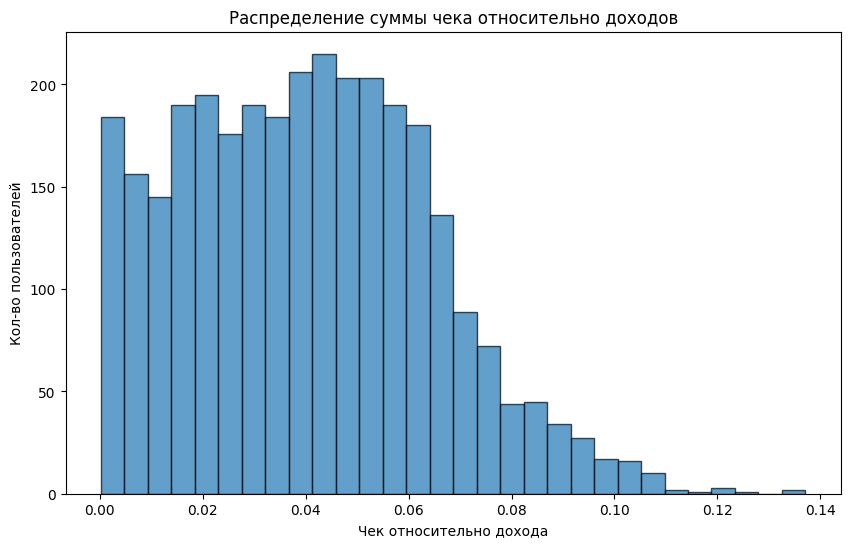

In [36]:
category_bill_sum = df.groupby(['userid', 'category'])['avg_bill'].sum().reset_index()

category_bill_sum = category_bill_sum.groupby('userid')['avg_bill'].sum().reset_index()

merged_df = pd.merge(category_bill_sum, unique_income[['userid', 'income']], on='userid')
merged_df['bill_to_income_ratio'] = merged_df['avg_bill'] / merged_df['income']
plt.figure(figsize=(10, 6))
plt.hist(merged_df['bill_to_income_ratio'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Чек относительно дохода')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение суммы чека относительно доходов')
plt.show()

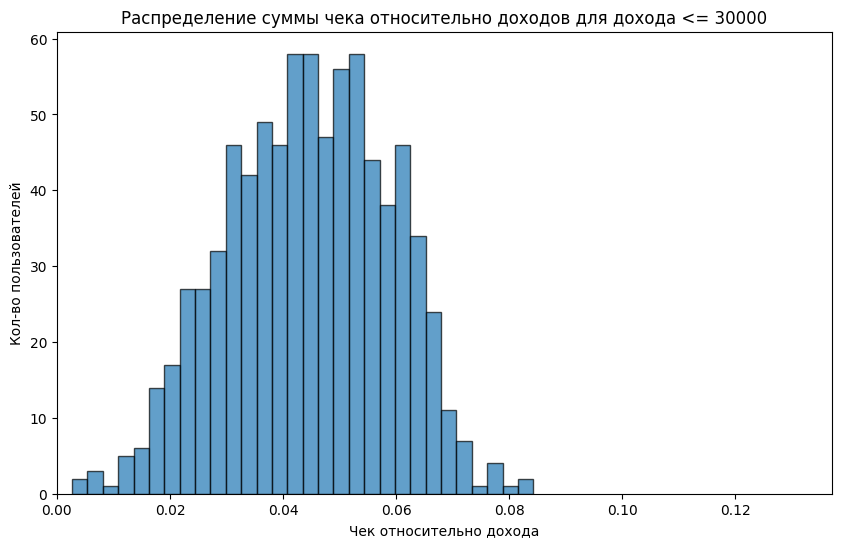

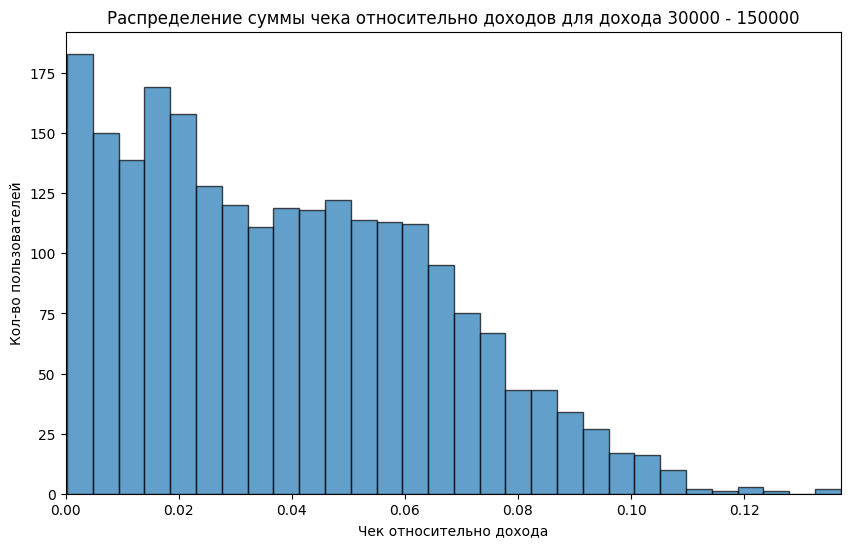

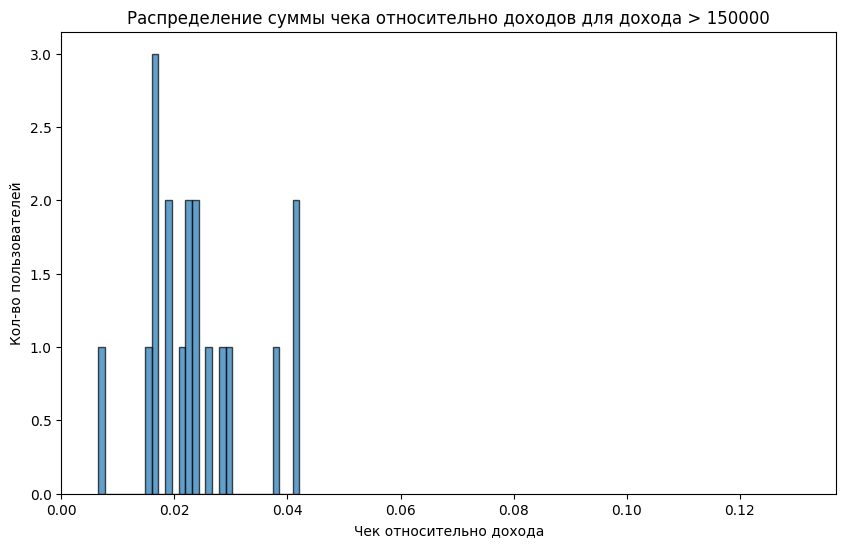

In [37]:
low_income_ratio = merged_df[merged_df['income'] <= 30000]
mid_income_ratio = merged_df[(merged_df['income'] > 30000) & (merged_df['income'] <= 150000)]
high_income_ratio = merged_df[merged_df['income'] > 150000]

x_limits = (0, merged_df['bill_to_income_ratio'].max())
plt.figure(figsize=(10, 6))
plt.hist(low_income_ratio['bill_to_income_ratio'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Чек относительно дохода')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение суммы чека относительно доходов для дохода <= 30000')
plt.xlim(x_limits)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(mid_income_ratio['bill_to_income_ratio'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Чек относительно дохода')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение суммы чека относительно доходов для дохода 30000 - 150000')
plt.xlim(x_limits)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(high_income_ratio['bill_to_income_ratio'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Чек относительно дохода')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение суммы чека относительно доходов для дохода > 150000')
plt.xlim(x_limits)
plt.show()

# Средний чек для пользователя

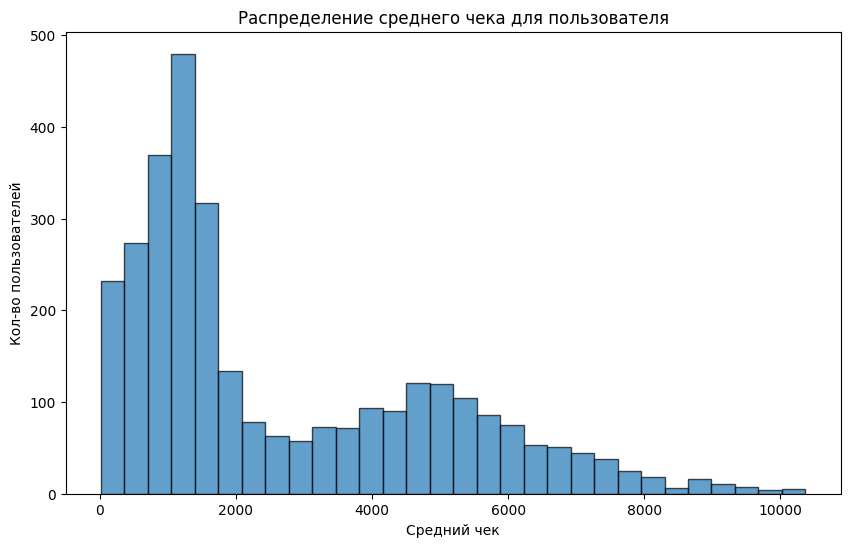

count     3116.000000
mean      2686.351412
std       2265.517774
min         16.000000
25%        966.250000
50%       1603.500000
75%       4514.000000
max      10368.000000
Name: avg_bill, dtype: float64


In [38]:
category_bill_sum = df.groupby(['userid', 'category'])['avg_bill'].sum().reset_index()

user_bill_sum = category_bill_sum.groupby('userid')['avg_bill'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.hist(user_bill_sum['avg_bill'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Средний чек')
plt.ylabel('Кол-во пользователей')
plt.title('Распределение среднего чека для пользователя')
plt.show()

desc_stats = user_bill_sum['avg_bill'].describe()
print(desc_stats)

# Гистограмма возрастов и разбивка на категории

Text(0.5, 1.0, 'Распределение возрастов')

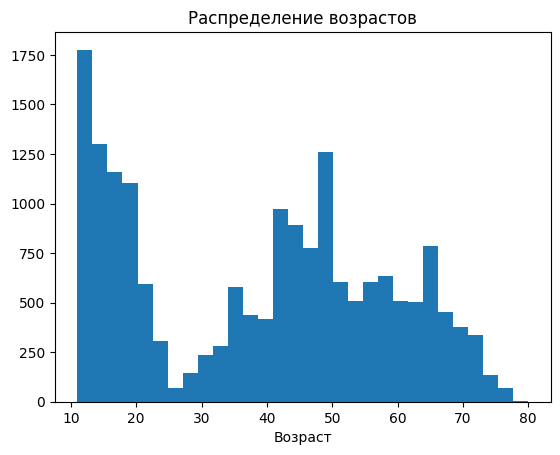

In [39]:
plt.hist(x=df['age'], bins=30)
plt.xlabel('Возраст')
plt.title('Распределение возрастов')

**Выводы**

1) Очень мало пользователей возрастом от 26 до 30 лет. Возможно, привлечение данной категории пользователей могло бы повысить продажи

2) Много клиентов до 18 лет


Разбиваем  по возрастам на 5 равных групп на основе перцентилей

In [40]:
def f(x, column='age'):
  p1 = int(np.percentile(df[column], 20))
  p2 = int(np.percentile(df[column], 40))
  p3 = int(np.percentile(df[column], 60))
  p4 = int(np.percentile(df[column], 80))
  if (x<=p1):
    return f'{p1} и младше'
  elif (x>p1 and x<=p2):
    return f'{p1}-{p2}'
  elif (x>p2 and x<=p3):
    return f'{p2}-{p3}'
  elif (x>p3 and x<=p4):
    return f'{p3}-{p4}'
  elif (x>p4):
    return f'{p4+1} и старше'

df['age_group'] = df['age'].map(f)

In [41]:
df['age_group'].value_counts()

age_group
34-47          3857
16 и младше    3606
16-34          3582
58 и старше    3562
47-57          3220
Name: count, dtype: int64

# Диаграмма зависимости количества покупок от возраста

Покупки пользователя на всех площадках:

In [42]:
df['purchases'] = df['mobile_purchases_count_avg'] + df['website_purchases_count_avg'] + df['store_purchases_count_avg'] + df['catalogue_purchases_count_avg']

Text(0.5, 1.0, 'Покупки на всех площадках')

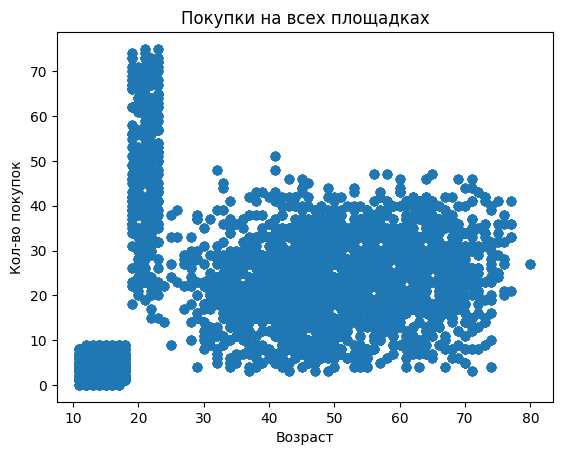

In [43]:
plt.scatter(x=df['age'], y=df['purchases'])
plt.xlabel('Возраст')
plt.ylabel('Кол-во покупок')
plt.title('Покупки на всех площадках')

Text(0.5, 1.0, 'Покупки через мобильное приложение')

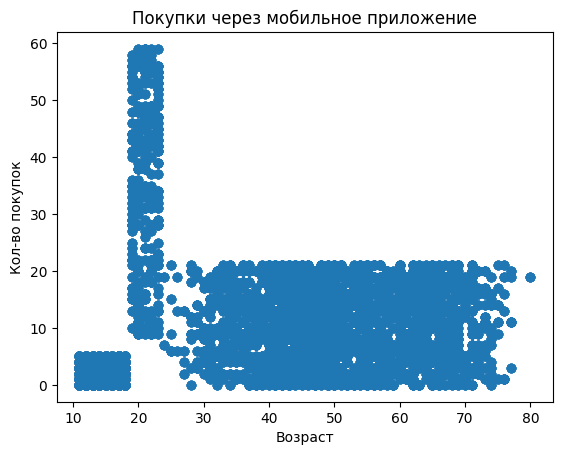

In [44]:
plt.scatter(x=df['age'], y=df['mobile_purchases_count_avg'])
plt.xlabel('Возраст')
plt.ylabel('Кол-во покупок')
plt.title('Покупки через мобильное приложение')

Text(0.5, 1.0, 'Покупки через веб-сайт')

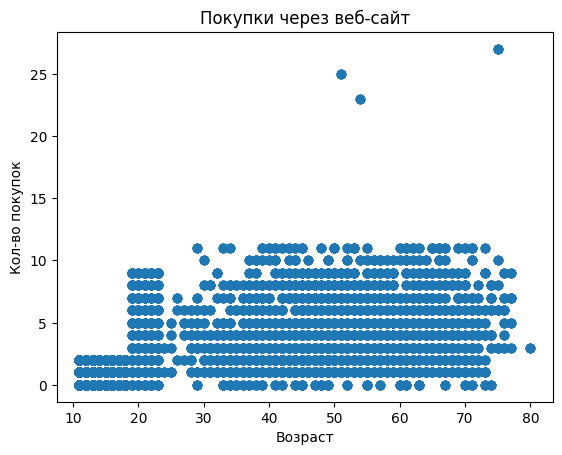

In [45]:
plt.scatter(x=df['age'], y=df['website_purchases_count_avg'])
plt.xlabel('Возраст')
plt.ylabel('Кол-во покупок')
plt.title('Покупки через веб-сайт')

Text(0.5, 1.0, 'Покупки через онлайн-каталог')

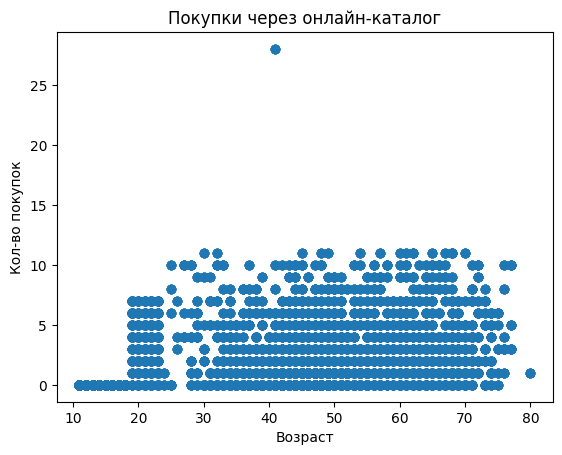

In [46]:
plt.scatter(x=df['age'], y=df['catalogue_purchases_count_avg'])
plt.xlabel('Возраст')
plt.ylabel('Кол-во покупок')
plt.title('Покупки через онлайн-каталог')

Text(0.5, 1.0, 'Покупки в магазине очно')

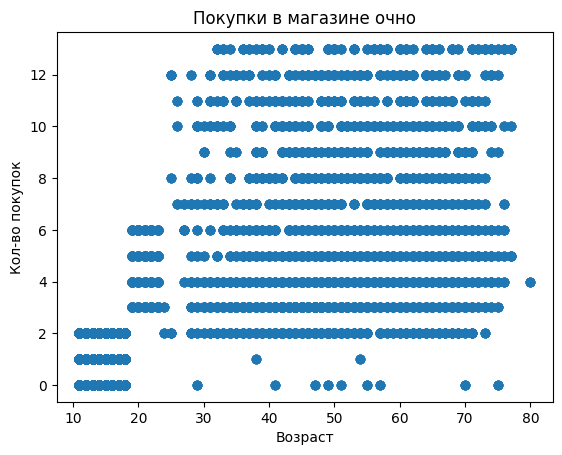

In [47]:
plt.scatter(x=df['age'], y=df['store_purchases_count_avg'])
plt.xlabel('Возраст')
plt.ylabel('Кол-во покупок')
plt.title('Покупки в магазине очно')

**Выводы**

1) Люди в возрасте до 19 лет совершают меньше покупок на всех площадках

2) Люди в возрасте от 19 до 23 лет совершают много покупок через мобильное приложение, за счёт чего данная категория выделяется среди остальных по числу покупок

# Жалобы за последние 3 месяца

In [48]:
df.groupby('userid')['complain_count'].sum().value_counts()

complain_count
0     1831
6      596
12     322
5      207
10     141
24       2
48       2
8        2
4        2
36       2
18       2
25       2
20       1
42       1
15       1
40       1
30       1
Name: count, dtype: int64

In [49]:
df.groupby('userid')['complain_count'].sum().map(lambda x: ">=3" if x>=3 else x).value_counts()

complain_count
0      1831
>=3    1285
Name: count, dtype: int64

# Рассчёт Conversion Rate

Рассчитаем, какова доля купивших среди клиентов, посетивших сайт/приложение

In [50]:
print('Mobile: ', (df['mobile_purchases_count_avg'].sum() / df['mobile_visit_count_avg'].sum()).round(2))

Mobile:  0.4


In [51]:
print('Website: ', (df['website_purchases_count_avg'].sum() / df['website_visit_count_avg'].sum()).round(2))

Website:  0.58


**Вывод:**
Пользователь с большей вероятностью совершит покупку, если будет находиться на веб-сайте

Conversion Rate по возрастам

In [52]:
s = []
for group in df['age_group'].unique():
    conv = df[df['age_group']==group]['mobile_purchases_count_avg'].sum() / df[df['age_group']==group]['mobile_visit_count_avg'].sum()
    s.append(str('Group "' + str(group) + '" (mobile): ' + str(conv.round(2))))

for i in s:
  print(i)

Group "47-57" (mobile): 0.56
Group "58 и старше" (mobile): 0.56
Group "34-47" (mobile): 0.56
Group "16 и младше" (mobile): 0.1
Group "16-34" (mobile): 0.36


In [53]:
s = []
for group in df['age_group'].unique():
    conv = df[df['age_group']==group]['website_purchases_count_avg'].sum() / df[df['age_group']==group]['website_visit_count_avg'].sum()
    s.append(str('Group "' + str(group) + '" (website): ' + str(conv.round(2))))

for i in s:
  print(i)

Group "47-57" (website): 0.73
Group "58 и старше" (website): 0.93
Group "34-47" (website): 0.63
Group "16 и младше" (website): 0.23
Group "16-34" (website): 0.4


**Выводы**

1) Конверсии для пользователей возрастом 16 лет и младше ниже, чем для других категорий

2) Чем старше пользователь, тем выше вероятность, что он совершит покупку, находясь на сайте/в приложении

# Анализ даты присоединения новых клиентов

In [54]:
df['join_datetime'] = pd.to_datetime(df['join_datetime'])

In [55]:
df['join_datetime_year'] = df['join_datetime'].dt.year
df['join_datetime_month'] = df['join_datetime'].dt.month #%12 // 3 + 1

In [56]:
df.groupby('join_datetime_year')['join_datetime_month'].value_counts(sort=False)

join_datetime_year  join_datetime_month
2022                4                       48
                    5                      474
                    6                      560
                    7                      605
                    8                      547
                    9                      529
                    10                     501
                    11                     674
                    12                     770
2023                1                      846
                    2                      656
                    3                      776
                    4                      795
                    5                      887
                    6                      811
                    7                      867
                    8                      910
                    9                      949
                    10                     700
                    11                     769
                    

Количество зарегистрировавшихся клиентов по месяцам

*В июне 2024 данные собраны не за все дни

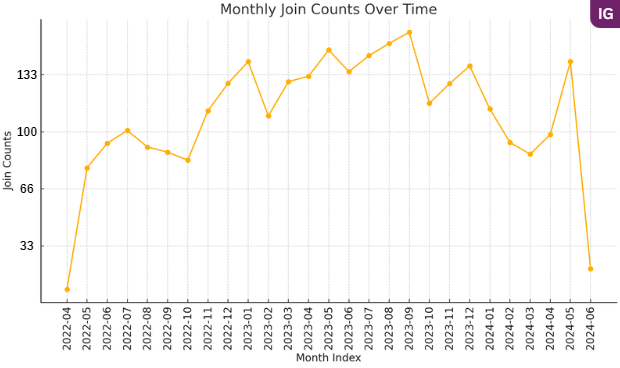

**Выводы**

1) С момента открытия наблюдяется приток клиентов, число новых пользователей растёт

2) В сентябре 2023 года достигается пик по количеству новых клиентов

3) После сентября 2023 года количество новых клиентов начинает падать. Есть смысл подробно рассмотреть данные клиентов, присоединившихся до этой даты и после



## Сравнение: Клиенты, приходившие в сентябре 2023 и раньше - Клиенты, приходившие после сентября 2023.

До сентября 2023 года количество новых клиентов каждый месяц, в основном, увеличивалось и в этот месяц достигло максимального значения. После этого начался спад, хоть и не значительный

Гипотеза: Клиенты, приходившие до сентября 2023 в большинстве своём отличаются от клиентов, приходивших после, с чем и связан спад (т.к. мы упускаем какой-то сегмент новых пользователей)

In [57]:
import datetime
date = np.datetime64(datetime.date(2023, 10, 1))
df1 = df[df['join_datetime'] < date]
df2 = df[df['join_datetime'] >= date]

### Сравнение по категориям

Смотрим на возраст клиентов

Text(0.5, 1.0, 'После 09-2023')

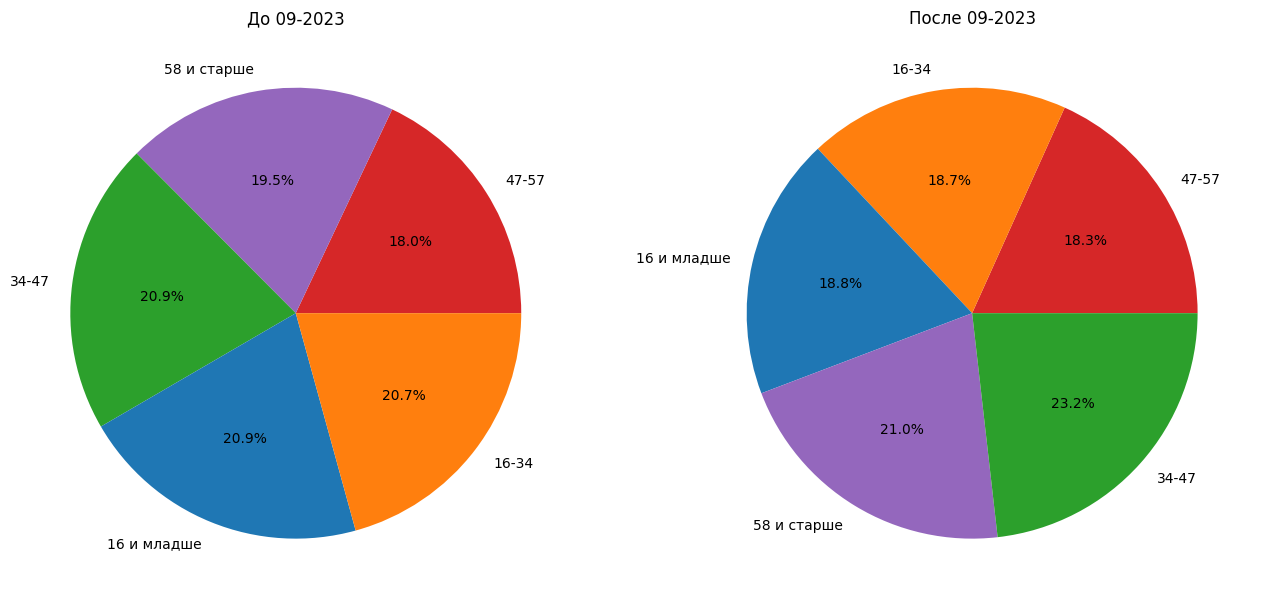

In [58]:
colours = {'16 и младше': 'C0',
           '16-34': 'C1',
           '34-47': 'C2',
           '47-57': 'C3',
           '58 и старше': 'C4'
           }

df1_age = df1['age_group'].value_counts(sort=False)
df2_age = df2['age_group'].value_counts(sort=False)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 8, forward=True)
ax[0].pie(df1_age, labels = df1_age.index, autopct='%1.1f%%', colors=[colours[key] for key in df1_age.index])
ax[0].set_title('До 09-2023')
ax[1].pie(df2_age, labels = df2_age.index, autopct='%1.1f%%', colors=[colours[key] for key in df2_age.index])
ax[1].set_title('После 09-2023')

Смотрим на долю каждой категории заказов в общей сумме чеков

Text(0.5, 1.0, 'После 09-2023')

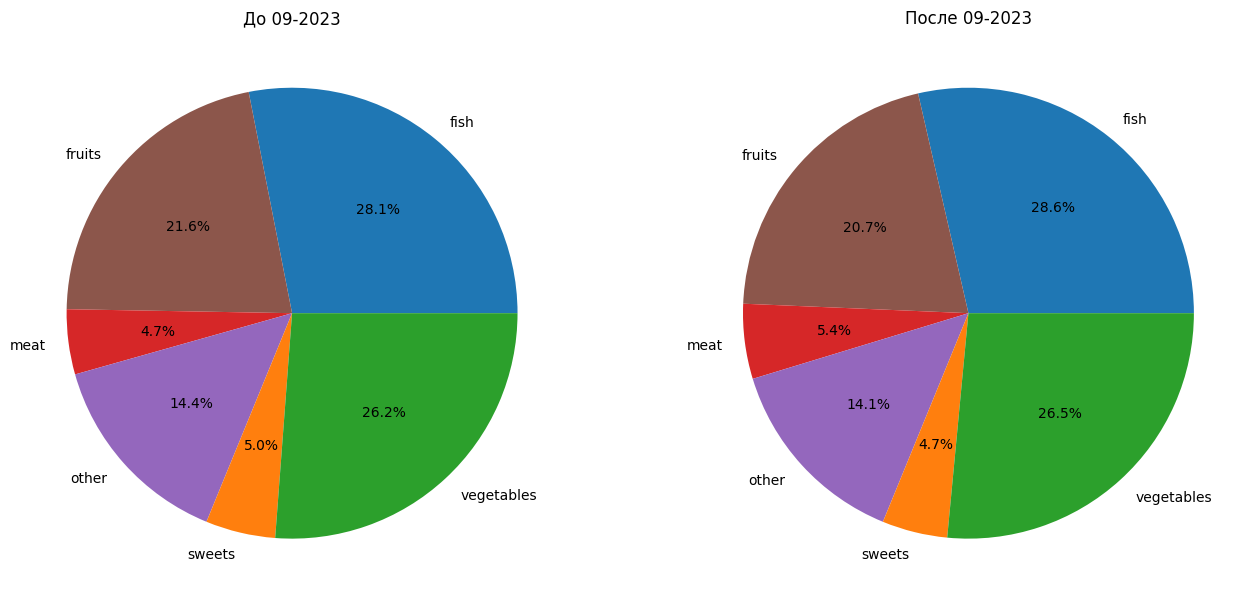

In [59]:
colours = {'fish': 'C0',
           'sweets': 'C1',
           'vegetables': 'C2',
           'meat': 'C3',
           'other': 'C4',
           'fruits': 'C5'
           }

df1_cat = df1.groupby('category')['avg_bill'].sum()
df2_cat = df2.groupby('category')['avg_bill'].sum()

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 8, forward=True)
ax[0].pie(df1_cat, labels = df1_cat.index, autopct='%1.1f%%', colors=[colours[key] for key in df1_cat.index])
ax[0].set_title('До 09-2023')
ax[1].pie(df2_cat, labels = df2_cat.index, autopct='%1.1f%%', colors=[colours[key] for key in df2_cat.index])
ax[1].set_title('После 09-2023')

Смотрим на семейное положение и детей

Text(0.5, 1.0, 'После 09-2023')

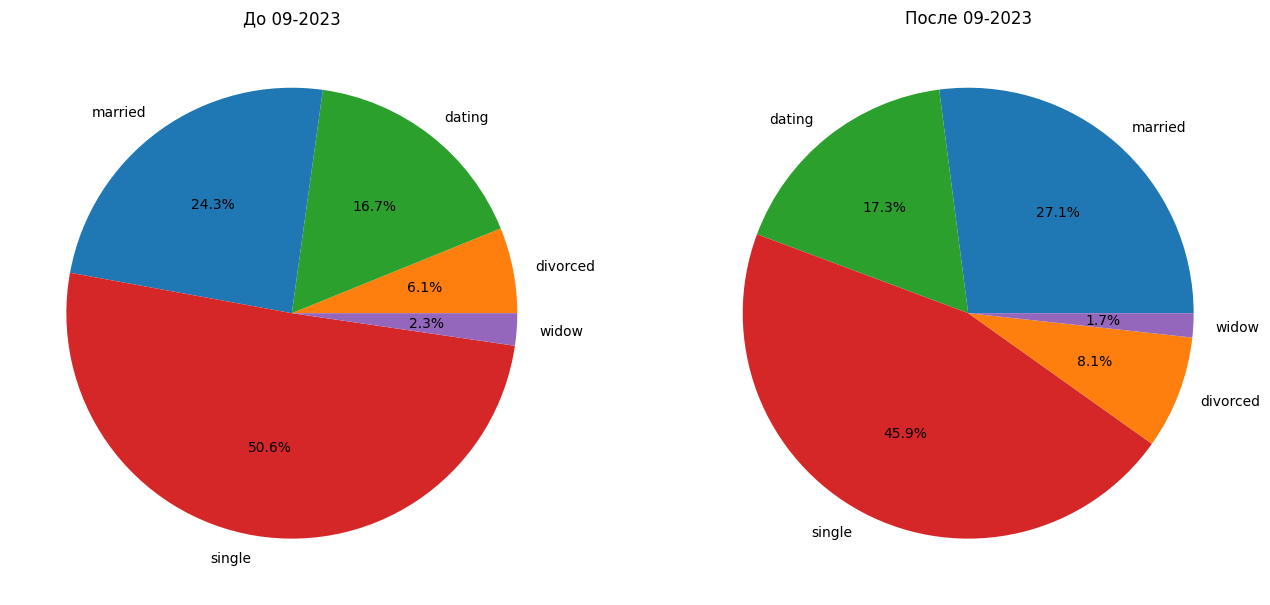

In [60]:
colours = {'married': 'C0',
           'divorced': 'C1',
           'dating': 'C2',
           'single': 'C3',
           'widow': 'C4',
           }

df1_mar = df1['marital'].value_counts(sort=False)
df2_mar = df2['marital'].value_counts(sort=False)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 8, forward=True)
ax[0].pie(df1_mar, labels = df1_mar.index, autopct='%1.1f%%', colors=[colours[key] for key in df1_mar.index])
ax[0].set_title('До 09-2023')
ax[1].pie(df2_mar, labels = df2_mar.index, autopct='%1.1f%%', colors=[colours[key] for key in df2_mar.index])
ax[1].set_title('После 09-2023')

Text(0.5, 1.0, 'После 09-2023')

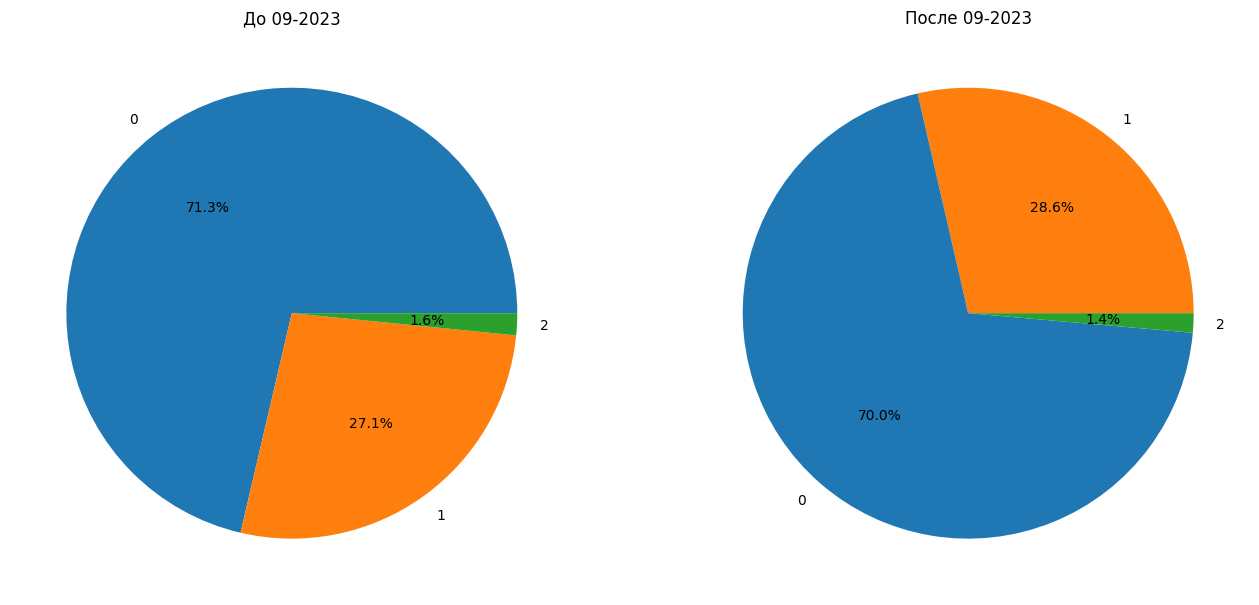

In [61]:
colours = {0: 'C0',
           1: 'C1',
           2: 'C2',
           }

df1_kids = df1['kids'].value_counts(sort=False)
df2_kids = df2['kids'].value_counts(sort=False)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 8, forward=True)
ax[0].pie(df1_kids, labels = df1_kids.index, autopct='%1.1f%%', colors=[colours[key] for key in df1_kids.index])
ax[0].set_title('До 09-2023')
ax[1].pie(df2_kids, labels = df2_kids.index, autopct='%1.1f%%', colors=[colours[key] for key in df2_kids.index])
ax[1].set_title('После 09-2023')

**Вывод**

Значимых различий не наблюдается. Отклонения на 1-2%

### Сравнение эффектов рекламных кампаний

In [62]:
print("Before 09-2023")
print('1st Company ', df1[df1['marketing_company_outcome_1']==1].shape[0]/df1['marketing_company_outcome_1'].shape[0])
print('2nd Company ', df1[df1['marketing_company_outcome_2']==1].shape[0]/df1['marketing_company_outcome_2'].shape[0])
print('3rd Company ', df1[df1['marketing_company_outcome_3']==1].shape[0]/df1['marketing_company_outcome_3'].shape[0])
print('4th Company ', df1[df1['marketing_company_outcome_4']==1].shape[0]/df1['marketing_company_outcome_4'].shape[0])
print('5th Company ', df1[df1['marketing_company_outcome_5']==1].shape[0]/df1['marketing_company_outcome_5'].shape[0])

Before 09-2023
1st Company  0.22630069643588693
2nd Company  0.188529291274068
3rd Company  0.2376075378943056
4th Company  0.21081523965587873
5th Company  0.22507169192953708


In [63]:
print("After 09-2023")
print('1st Company ', df2[df2['marketing_company_outcome_1']==1].shape[0]/df2['marketing_company_outcome_1'].shape[0])
print('2nd Company ', df2[df2['marketing_company_outcome_2']==1].shape[0]/df2['marketing_company_outcome_2'].shape[0])
print('3rd Company ', df2[df2['marketing_company_outcome_3']==1].shape[0]/df2['marketing_company_outcome_3'].shape[0])
print('4th Company ', df2[df2['marketing_company_outcome_4']==1].shape[0]/df2['marketing_company_outcome_4'].shape[0])
print('5th Company ', df2[df2['marketing_company_outcome_5']==1].shape[0]/df2['marketing_company_outcome_5'].shape[0])

After 09-2023
1st Company  0.1768054073283529
2nd Company  0.18427605834222696
3rd Company  0.21077908217716115
4th Company  0.20757737459978656
5th Company  0.2102454642475987


На клиентов из первой подвыборки первая рекламная кампания оказала чуть больший эффект. Возможно она была проведена до сентября 2023 года и могла дать результаты в виде новых клиентов

### Сравнение по количественным признакам

Доход

In [64]:
df1['income'].describe()

count     12205.000000
mean      63192.491684
std       31766.657683
min       25501.000000
25%       26876.000000
50%       63232.000000
75%       81946.000000
max      273672.000000
Name: income, dtype: float64

In [65]:
df2['income'].describe()

count      5622.000000
mean      63454.363927
std       29681.285598
min       25500.000000
25%       26988.000000
50%       63998.000000
75%       82118.000000
max      264607.000000
Name: income, dtype: float64

Количество покупок

In [66]:
df1['purchases'].describe()

count    12205.000000
mean        20.024088
std         14.855865
min          0.000000
25%          6.000000
50%         19.000000
75%         29.000000
max         75.000000
Name: purchases, dtype: float64

In [67]:
df2['purchases'].describe()

count    5622.000000
mean       19.722163
std        13.977910
min         0.000000
25%         7.000000
50%        19.000000
75%        28.000000
max        75.000000
Name: purchases, dtype: float64

Значения среднего, максимума и квартилей почти одинаковы для обоих признаков. Значимых различий между группами нет

### Сравнение Conversion Rate

In [68]:
print("Before 09-2023")
print('Website: ', df1['website_purchases_count_avg'].sum() / df1['website_visit_count_avg'].sum())
print('Mobile: ', df1['mobile_purchases_count_avg'].sum() / df1['mobile_visit_count_avg'].sum())

Before 09-2023
Website:  0.5698495235881943
Mobile:  0.39667258535863575


In [69]:
print("After 09-2023")
print('Website: ', df2['website_purchases_count_avg'].sum() / df2['website_visit_count_avg'].sum())
print('Mobile: ', df2['mobile_purchases_count_avg'].sum() / df2['mobile_visit_count_avg'].sum())

After 09-2023
Website:  0.5997574674495788
Mobile:  0.41227691732458976


**Итог:** значимых различий между клиентами, присоединившимися до сентября 2023 и после нет. Гипотеза не подтвердилась

# Оценка эффективности площадок для рекламы и каналов привлечения пользователей (магазин, онлайн каталог, веб-сайт, приложение)

**Выводы**

1) Пользователей возрастом 16 лет и младше не удаётся привлечь ни на одной из площадок. Если рекламные кампании ранее подразумевали привлечение данной категории, то они были не эффективны. Если нет, то возможно стоит привлечь больше семей с детьми, добавить больше товаров для данной категории.

2) Через мобильное приложение совершается гораздо больше покупок, чем другими способами. При этом важно помнить, что конверсия при этом выше у веб-сайта

3) Онлайн-каталог не является эффективной площадкой

4) Более возрастные пользователи совершают больше покупок очно в магазине

In [70]:
df.groupby('age_group')[['store_purchases_count_avg', 'catalogue_purchases_count_avg', 'website_purchases_count_avg', 'mobile_purchases_count_avg']].agg(['sum', 'mean', 'median'])

store_purchases_count_avg                   \
                                  sum      mean median   
age_group                                                
16 и младше                      3630  1.006656    1.0   
16-34                           12836  3.583473    3.0   
34-47                           19936  5.168784    4.0   
47-57                           17962  5.578261    4.0   
58 и старше                     22977  6.450590    6.0   

            catalogue_purchases_count_avg                   \
                                      sum      mean median   
age_group                                                    
16 и младше                             0  0.000000    0.0   
16-34                                7440  2.077052    1.0   
34-47                                7561  1.960332    1.0   
47-57                                7604  2.361491    1.0   
58 и старше                         11283  3.167602    2.0   

            website_purchases_count_avg                   \
                                    sum      mean median   
age_group                                                  
16 и младше                        3432  0.951747    1.0   
16-34                             11008  3.073143    2.0   
34-47                             14102  3.656209    3.0   
47-57                             13295  4.128882    3.0   
58 и старше                       16190  4.545199    4.0   

            mobile_purchases_count_avg                    
                                   sum       mean median  
age_group                                                 
16 и младше                       8586   2.381032    2.0  
16-34                            63451  17.713847   11.0  
34-47                            40505  10.501685   10.0  
47-57                            34315  10.656832   11.0  
58 и старше                      39159  10.993543   11.0

In [71]:
df.groupby('marital')[['store_purchases_count_avg', 'catalogue_purchases_count_avg', 'website_purchases_count_avg', 'mobile_purchases_count_avg']].agg(['sum', 'mean', 'median'])

store_purchases_count_avg                   \
                               sum      mean median   
marital                                               
dating                       17112  5.696405    5.0   
divorced                      6853  5.687137    5.0   
married                      25722  5.728731    5.0   
single                       25250  2.886044    2.0   
widow                         2404  6.343008    6.0   

         catalogue_purchases_count_avg                   \
                                   sum      mean median   
marital                                                   
dating                            7505  2.498336    1.0   
divorced                          3073  2.550207    2.0   
married                          10778  2.400445    1.0   
single                           11367  1.299234    0.0   
widow                             1165  3.073879    2.0   

         website_purchases_count_avg                   \
                                 sum      mean median   
marital                                                 
dating                         12208  4.063915    3.0   
divorced                        5134  4.260581    4.0   
married                        17976  4.003563    3.0   
single                         20942  2.393645    2.0   
widow                           1767  4.662269    4.0   

         mobile_purchases_count_avg                    
                                sum       mean median  
marital                                                
dating                        32673  10.876498   11.0  
divorced                      12630  10.481328   10.0  
married                       48745  10.856347   11.0  
single                        88053  10.064350    4.0  
widow                          3915  10.329815   10.0

# F-тест, проверка гипотезы о средних чеках и возрасте

Нулевая гипотеза: У людей старше 16 сумма покупки не зависит от возраста во всех категориях товаров

Разбиваем по категориям и считаем медианное значение для каждой категории и группы по возрастам

In [72]:
fruits_df = df[df["category"] == "fruits"]
sweets_df = df[df["category"] == "sweets"]
vegetables_df = df[df["category"] == "vegetables"]
meat_df = df[df["category"] == "meat"]
other_df = df[df["category"] == "other"]
alcohol_df = df[df["category"] == "alcohol"]
fish_df = df[df["category"] == "fish"]

In [73]:
q_20 = 20
q_40 = 40
q_60 = 60
q_80 = 80
q_100 = 100

for data in [fruits_df, sweets_df, vegetables_df, meat_df, other_df, fish_df]:
    print(f'{"  категория":12} | {"возраст        ":>8}  | {"cреднее(median) знач. для возрастов":>9}')
    #f'{name:15} | {lat:9.4f} | {lon:9.4f}'
    print(f'   {data.category.unique()[0]:9} | до {np.percentile(data.age, q=q_20):1.0f} лет        |         {data[data.age <= np.percentile(data.age, q=q_20)].avg_bill.median():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_20):1.0f} до {np.percentile(data.age, q=q_40):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_40)) & (data.age > np.percentile(data.age, q=q_20))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_40):1.0f} до {np.percentile(data.age, q=q_60):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_60)) & (data.age > np.percentile(data.age, q=q_40))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_60):1.0f} до {np.percentile(data.age, q=q_80):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_80)) & (data.age > np.percentile(data.age, q=q_60))].avg_bill.max():7.0f}')
    print(f'   {data.category.unique()[0]:9} | oт {np.percentile(data.age, q=q_80):1.0f} до {np.percentile(data.age, q=q_100):1.0f} лет  |         {data[(data.age <= np.percentile(data.age, q=q_100)) & (data.age > np.percentile(data.age, q=q_80))].avg_bill.max():7.0f}')
    print("\n")

  категория  | возраст          | cреднее(median) знач. для возрастов
   fruits    | до 17 лет        |             510
   fruits    | oт 17 до 34 лет  |            2985
   fruits    | oт 34 до 47 лет  |            2985
   fruits    | oт 47 до 58 лет  |            2955
   fruits    | oт 58 до 80 лет  |            2910


  категория  | возраст          | cреднее(median) знач. для возрастов
   sweets    | до 17 лет        |             168
   sweets    | oт 17 до 34 лет  |             441
   sweets    | oт 34 до 47 лет  |             384
   sweets    | oт 47 до 58 лет  |             396
   sweets    | oт 58 до 80 лет  |             441


  категория  | возраст          | cреднее(median) знач. для возрастов
   vegetables | до 17 лет        |             294
   vegetables | oт 17 до 34 лет  |            2987
   vegetables | oт 34 до 47 лет  |            3212
   vegetables | oт 47 до 58 лет  |            3181
   vegetables | oт 58 до 80 лет  |            3132


  категория  | возраст       

На основе этих данных создавалась таблица для check_data

In [74]:
check_data = pd.read_excel('/content/drive/MyDrive/Dataton24/data_check.xlsx', index_col=0, header=0)

In [75]:
check_data

,<17,17-34,34-47,47-58,58-80
Fruits,510,2985,2985,2995,2910
Sweets,168,441,384,396,441
Vegetables,294,2987,3212,3181,3132
Meat,72,594,594,597,594
Other,14,1955,1990,1931,1968
Fish,108,3500,3302,3206,3612


In [76]:
check_data = check_data.drop(columns=['<17'])
check_data

,17-34,34-47,47-58,58-80
Fruits,2985,2985,2995,2910
Sweets,441,384,396,441
Vegetables,2987,3212,3181,3132
Meat,594,594,597,594
Other,1955,1990,1931,1968
Fish,3500,3302,3206,3612


In [77]:
from scipy.stats import f_oneway

f_oneway(check_data['17-34'], check_data['34-47'], check_data['47-58'], check_data['58-80'])

F_onewayResult(statistic=0.00198392505351497, pvalue=0.999873625351686)

p-значение: 0.9998, нулевая гипотеза верна

# Возможная целевая аудитория: люди возрастом от 19 до 23 лет

Вернёмся к графику, который был представлен ранее

Люди в возрасте от 19 до 23 лет совершают гораздо больше покупок

Сравним выборку людей от 19 до 23 лет с остальными

Text(0.5, 1.0, 'Все покупки')

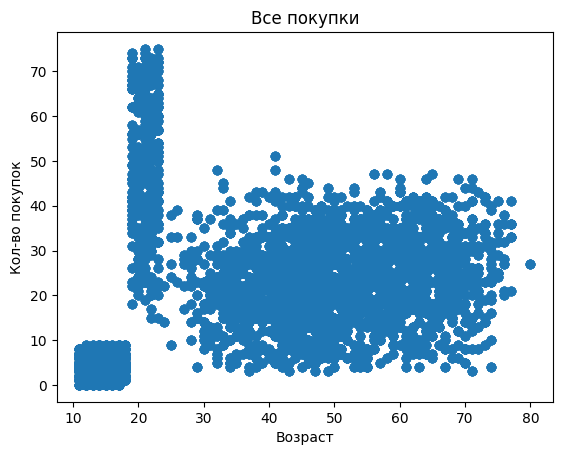

In [78]:
plt.scatter(x=df['age'], y=df['purchases'])
plt.xlabel('Возраст')
plt.ylabel('Кол-во покупок')
plt.title('Все покупки')

In [79]:
df_1 = df[(df['age'] < 19) | (df['age'] > 23)]
df_2 = df[(df['age'] >= 19) & (df['age'] <= 23)]

## Доход

In [80]:
df_1['income'].describe()

count     16398.000000
mean      61971.060251
std       29938.370939
min       25500.000000
25%       26791.000000
50%       61959.000000
75%       83962.000000
max      159227.000000
Name: income, dtype: float64

In [81]:
df_2['income'].describe()

count      1429.000000
mean      78238.872638
std       39454.997585
min       55176.000000
25%       63079.000000
50%       69465.000000
75%       74615.000000
max      273672.000000
Name: income, dtype: float64

Text(0.5, 1.0, 'Зависимость дохода от возраста')

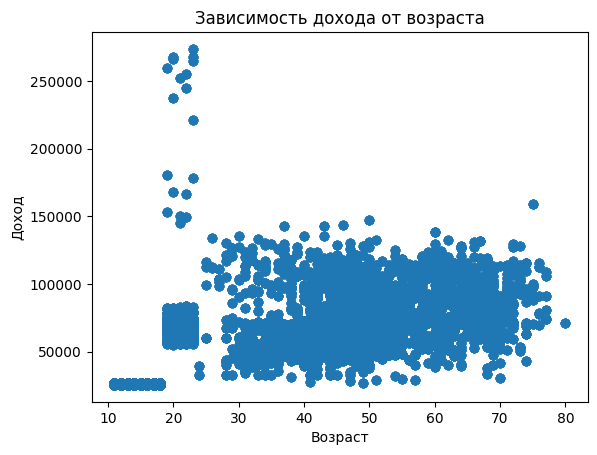

In [82]:
plt.scatter(x=df['age'], y=df['income'])
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.title('Зависимость дохода от возраста')

**Вывод**

Доходы людей из данной выборки выше. Причём выделяются отдельные клиенты с очень высоким доходом

## Покупки

In [83]:
df_1['mobile_purchases_count_avg'].describe()

count    16398.000000
mean         8.261007
std          6.537701
min          0.000000
25%          3.000000
50%          6.000000
75%         14.000000
max         21.000000
Name: mobile_purchases_count_avg, dtype: float64

In [84]:
df_2['mobile_purchases_count_avg'].describe()

count    1429.000000
mean       35.375787
std        14.966377
min         9.000000
25%        22.000000
50%        35.000000
75%        48.000000
max        59.000000
Name: mobile_purchases_count_avg, dtype: float64

Люди в возрасте от 19 до 23 лет гораздо больше покупают через приложение чем остальные

In [85]:
df_1['discount_purchases_count_avg'].describe()

count    16398.000000
mean         2.372911
std          1.829512
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: discount_purchases_count_avg, dtype: float64

In [86]:
df_2['discount_purchases_count_avg'].describe()

count    1429.000000
mean       14.734780
std         8.163185
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        29.000000
Name: discount_purchases_count_avg, dtype: float64

Люди в возрасте от 19 до 23 лет гораздо чаще делают заказы с товарами по скидке чем остальные

## Рекламные кампании

In [87]:
print("Age 19-23")
print('1st Company ', df_2[df_2['marketing_company_outcome_1']==1].shape[0]/df_2['marketing_company_outcome_1'].shape[0])
print('2nd Company ', df_2[df_2['marketing_company_outcome_2']==1].shape[0]/df_2['marketing_company_outcome_2'].shape[0])
print('3rd Company ', df_2[df_2['marketing_company_outcome_3']==1].shape[0]/df_2['marketing_company_outcome_3'].shape[0])
print('4th Company ', df_2[df_2['marketing_company_outcome_4']==1].shape[0]/df_2['marketing_company_outcome_4'].shape[0])
print('5th Company ', df_2[df_2['marketing_company_outcome_5']==1].shape[0]/df_2['marketing_company_outcome_5'].shape[0])

Age 19-23
1st Company  0.4688593421973408
2nd Company  0.4807557732680196
3rd Company  0.5318404478656403
4th Company  0.4429671098670399
5th Company  0.4828551434569629


In [88]:
print("Others")
print('1st Company ', df_1[df_1['marketing_company_outcome_1']==1].shape[0]/df_1['marketing_company_outcome_1'].shape[0])
print('2nd Company ', df_1[df_1['marketing_company_outcome_2']==1].shape[0]/df_1['marketing_company_outcome_2'].shape[0])
print('3rd Company ', df_1[df_1['marketing_company_outcome_3']==1].shape[0]/df_1['marketing_company_outcome_3'].shape[0])
print('4th Company ', df_1[df_1['marketing_company_outcome_4']==1].shape[0]/df_1['marketing_company_outcome_4'].shape[0])
print('5th Company ', df_1[df_1['marketing_company_outcome_5']==1].shape[0]/df_1['marketing_company_outcome_5'].shape[0])

Others
1st Company  0.18819368215636054
2nd Company  0.16160507378948652
3rd Company  0.20276863032077083
4th Company  0.1894743261373338
5th Company  0.19752408830345164


Проведённые рекламные кампании для людей от 19 до 23 лет были более чем в 2 раза эффективнее, чем для остальных

## Средний чек

Пользователи из данной группы отличаются не только количеством покупок, но и средним чеком. Для каждой категории сумма среднего выше для людей в возрасте от 19 до 23 лет (в некоторых категориях выше в 2 раза)

In [89]:
df_1.groupby('category')['avg_bill'].mean()

category
fish          686.594059
fruits        426.890028
meat          180.578505
other         383.029735
sweets        119.850071
vegetables    685.358557
Name: avg_bill, dtype: float64

In [90]:
df_2.groupby('category')['avg_bill'].mean()

category
fish          1465.517361
fruits        2016.996528
other          422.888087
sweets         249.576389
vegetables     910.690972
Name: avg_bill, dtype: float64

**Вывод**

Пользователей возрастом от 19 до 23 лет стоит рассмотреть как возможную целевую аудиторию. Данная группа пользователей отличается высоким доходом среди существующих клиентов. На данной группе пользователей эффективнее всего работали рекламные кампании. Пользователи из данной группы совершают большое число покупок и на большие суммы

**Возможные риски**

Выводы по данной группе сделаны только на основе имеющихся данных, где таких пользователей всего 200-300 чесловек. Есть риск уменьшения количества новых клиентов других возрастов

# Catboost

Попробовали обучить catboost.

На разных выборках модель не улавливает закономерности + rmse 340-450 на валидационной выборке.

Модель улавливает случайные признаки как важные.

Это скорее всего говорит о том, что модель не может качественно аппроксимировать данные.

In [91]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.3 MB/s eta 0:00:00


In [94]:
from sklearn.preprocessing import LabelBinarizer

df1 = df.copy()


label_binarizer = LabelBinarizer()


label_binarizer_output = label_binarizer.fit_transform(df1['category'])

result_df = pd.DataFrame(label_binarizer_output,
                         columns = label_binarizer.classes_)



def get_lab_bin_data(df1, column):
    label_binarizer = LabelBinarizer()
    label_binarizer_output = label_binarizer.fit_transform( df1[column])

    result_df = pd.DataFrame(label_binarizer_output,
                            columns = label_binarizer.classes_)

    result_df["index"] = result_df.index
    df1["index"] = df1.index

    return df1.merge(result_df, on="index")

df1 = get_lab_bin_data(df1, "marital")
df1 = get_lab_bin_data(df1, "category")

In [95]:
df1["rand_1"] = np.random.randint(len(df1), size=len(df1))
df1["rand_2"] = np.random.randint(len(df1), size=len(df1))
df1["rand_3"] = np.random.randint(len(df1), size=len(df1))
df1["rand_4"] = np.random.randint(len(df1), size=len(df1))

In [97]:
df1 = df1[[i for i in df1.columns if df1[i].dtype != ("O")]]

In [98]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 927


X = df1.drop("avg_bill", axis=1)
y = df1["avg_bill"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE+3)

In [99]:
from catboost import CatBoostRegressor


model = CatBoostRegressor(loss_function='RMSE')


model.fit(X_train, y_train, verbose=100)

Learning rate set to 0.062307
0:	learn: 618.3609517	total: 62.9ms	remaining: 1m 2s
100:	learn: 363.1663850	total: 576ms	remaining: 5.13s
200:	learn: 342.1377440	total: 1.08s	remaining: 4.29s
300:	learn: 324.4123550	total: 1.57s	remaining: 3.64s
400:	learn: 310.5668230	total: 2.07s	remaining: 3.09s
500:	learn: 298.3579423	total: 2.56s	remaining: 2.55s
600:	learn: 286.5601233	total: 3.06s	remaining: 2.03s
700:	learn: 276.0621498	total: 3.56s	remaining: 1.52s
800:	learn: 266.3923552	total: 4.06s	remaining: 1.01s
900:	learn: 258.2730008	total: 4.55s	remaining: 500ms
999:	learn: 250.3839013	total: 5.05s	remaining: 0us


In [100]:
from sklearn.metrics import mean_squared_error as mse

y_pred = model.predict(X_val)


print("Validation RMSE: ", np.sqrt(mse(y_val, y_pred)))

Validation RMSE:  363.9280479800608


In [102]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


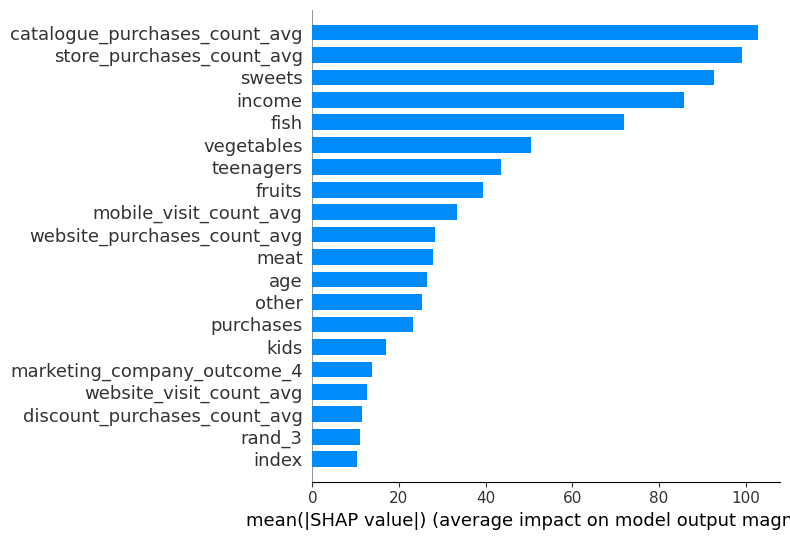

In [103]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", plot_size= 0.2)
plt.show()

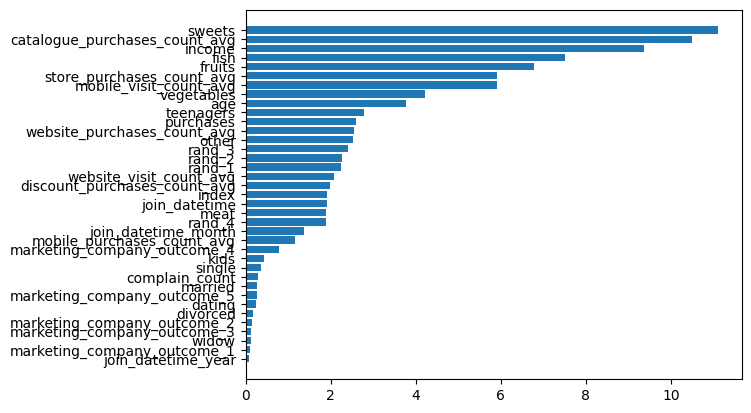

In [104]:
importances = model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Ещё данные по эффективности площадок (графики)

10431

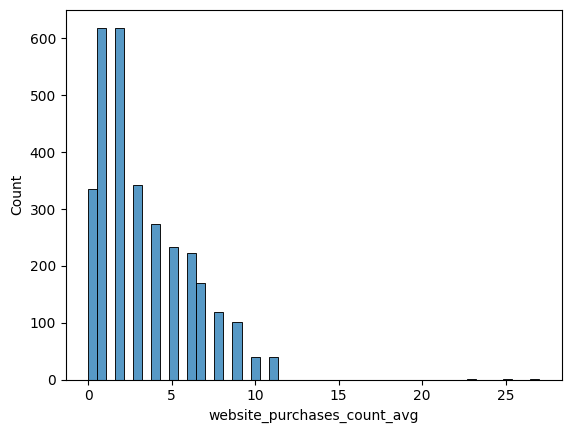

In [105]:
sns.histplot(data=data["website_purchases_count_avg"]);
data["website_purchases_count_avg"].sum()

13914

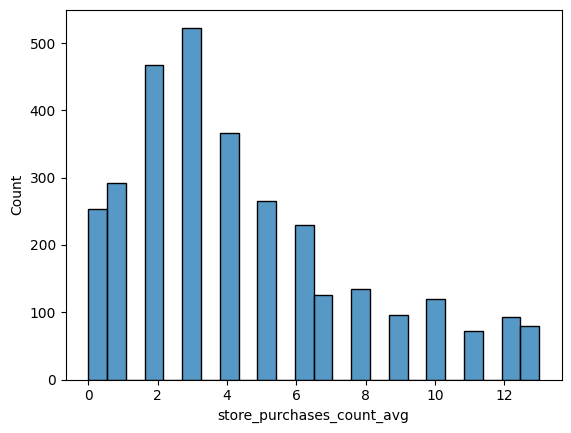

In [106]:
sns.histplot(data=data["store_purchases_count_avg"]);
data["store_purchases_count_avg"].sum()

10894

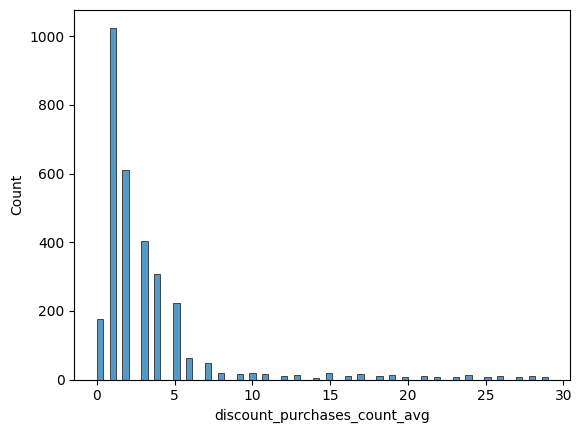

In [107]:
sns.histplot(data=data["discount_purchases_count_avg"]);
data["discount_purchases_count_avg"].sum()

6354

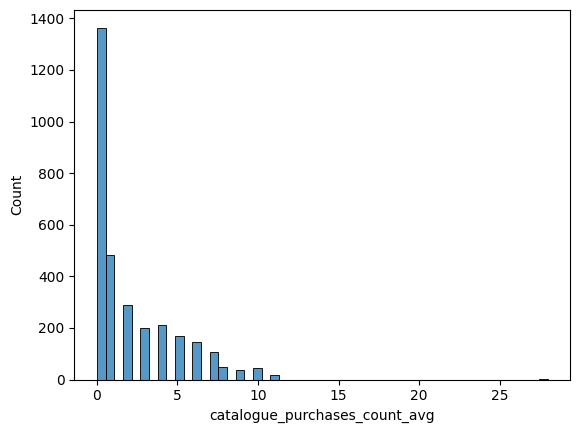

In [108]:
sns.histplot(data=data["catalogue_purchases_count_avg"]);
data["catalogue_purchases_count_avg"].sum()